In [35]:
import datetime
from sklearn_utils.utils import SkUtilsIO,filter_by_label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [36]:
X, y = SkUtilsIO('BC.csv').from_csv(
    label_column='stage')
y = ['healthy' if i == 'h' else 'bc' for i in y]

In [37]:
new_y = []
for item in y:
    if item == "bc":
        new_y.append(1)
    else:
        new_y.append(0)
np_y_new = np.array(new_y)

In [38]:
X_df = pd.read_excel('combined.xlsx')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(X_df), y, test_size=0.1, random_state=42)

Logistic Regression

In [40]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression(C=0.3e-6)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
kf = StratifiedKFold(n_splits=10)
log_scores = cross_val_score(logreg_cv, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1_micro')
print('kfold test: %s' % log_scores)
print('mean: %s' % log_scores.mean().round(3))
print('std: %s' % log_scores.std().round(3))

kfold test: [0.90909091 0.86363636 0.90909091 0.86363636 0.90909091 0.72727273
 0.9047619  1.         0.8        0.9       ]
mean: 0.879
std: 0.069


Random Forest

In [41]:
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
kf = StratifiedKFold(n_splits=10)
rf_scores = cross_val_score(rf, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1_micro')
print('kfold test: %s' % rf_scores)
print('mean: %s' % rf_scores.mean().round(3))
print('std: %s' % rf_scores.std().round(3))

kfold test: [0.86363636 0.86363636 0.81818182 0.90909091 0.81818182 1.
 0.9047619  1.         0.9        0.8       ]
mean: 0.888
std: 0.067


SVM

In [42]:
svm = SVC(gamma=1)
svm.fit(X_train, y_train)
kf = StratifiedKFold(n_splits=10)
svm_scores = cross_val_score(svm, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1_micro')
print('kfold test: %s' % svm_scores)
print('mean: %s' % svm_scores.mean().round(3))
print('std: %s' % svm_scores.std().round(3))

kfold test: [0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.66666667 0.66666667 0.65       0.65      ]
mean: 0.645
std: 0.012


In [43]:
kf = StratifiedKFold(n_splits=10, random_state=43)
logreg = LogisticRegression(C=0.3e-6)
logreg_cv_split = GridSearchCV(logreg, param_grid, cv=5)
logreg_results = []
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = logreg_cv_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        logreg_results.append(classification_report(clf.predict(X_test), y_test))

In [44]:
rf_results = []
kf = StratifiedKFold(n_splits=10, random_state=43)
randomforest_split = RandomForestClassifier(max_depth=4, random_state=0)
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = randomforest_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        rf_results.append(classification_report(clf.predict(X_test), y_test))

In [45]:
svm_results = []
kf = StratifiedKFold(n_splits=10, random_state=43)
svm_split = SVC(gamma='auto')
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = svm_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        svm_results.append(classification_report(clf.predict(X_test), y_test))

C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no t

# Logistic Regression Fold Based Scores

In [46]:
for item in logreg_results:
    print(item)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.82      0.90        17

    accuracy                           0.86        22
   macro avg       0.81      0.91      0.84        22
weighted avg       0.91      0.86      0.87        22

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.88      0.93        16

    accuracy                           0.91        22
   macro avg       0.88      0.94      0.90        22
weighted avg       0.93      0.91      0.91        22

              preci

# Random Forest Fold Based Scores

In [47]:
for item in rf_results:
    print(item)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.82      0.90        17

    accuracy                           0.86        22
   macro avg       0.81      0.91      0.84        22
weighted avg       0.91      0.86      0.87        22

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.82      0.90        17

    accuracy                           0.86        22
   macro avg       0.81      0.91      0.84        22
weighted avg       0.91      0.86      0.87        22

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.78      0.88        18

    accuracy                           0.82        22
   macro avg       0.75      0.89      0.77        22
weighted avg       0.91      0.82      0.84        22

              preci

# SVM Fold Based Scores

In [48]:
for item in svm_results:
    print(item)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              preci

,classifiers,mean
1,rf,0.888
0,logreg,0.879
2,svm,0.645


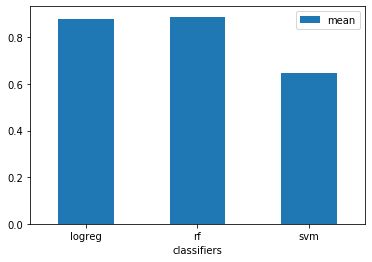

In [49]:
df = pd.DataFrame({'classifiers': ['logreg', 'rf', 'svm'], 'mean': [log_scores.mean().round(3), rf_scores.mean().round(3),svm_scores.mean().round(3)]})
ax = df.plot.bar(x='classifiers', y='mean', rot=0)
df.sort_values('mean', ascending=False)

In [52]:
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import VarianceThreshold, f_classif


def variance_threshold_on_df(df: pd.DataFrame, threshold=0):
    vt = VarianceThreshold(threshold)
    vt.fit(df.values)
    return df.iloc[:, vt.variances_ > threshold]

def feature_importance_anova(X,
                             y,
                             threshold=0.001,
                             correcting_multiple_hypotesis=True,
                             method='fdr_bh',
                             alpha=0.1,
                             sort_by='F'):
    '''
    Provide signifance for features in dataset with anova using multiple hypostesis testing
    :X: List of dict with key as feature names and values as features
    :y: Labels
    :threshold: Low-variens threshold to eliminate low varience features
    :correcting_multiple_hypotesis: corrects p-val with multiple hypotesis testing
    :method: method of multiple hypotesis testing
    :alpha: alpha of multiple hypotesis testing
    :sort_by: sorts output dataframe by pval or F
    :return: DataFrame with F and pval for each feature with their average values 
    '''
    df = variance_threshold_on_df(
        pd.DataFrame.from_records(X), threshold=threshold)

    F, pvals = f_classif(df.values, y)

    if correcting_multiple_hypotesis:
        _, pvals, _, _ = multipletests(pvals, alpha=alpha, method=method)

    df['labels'] = y
    df_mean = df.groupby('labels').mean().T

    df_mean['F'] = F
    df_mean['pval'] = pvals

    return df_mean.sort_values(sort_by, ascending=True)

In [53]:
df_pathways = feature_importance_anova(X_df.fillna(0), y)
df_pathways.head(10)

labels,bc,healthy,F,pval
Histidine metabolism _new,0.101254,9.611792e-11,0.000037,0.995139
Histidine metabolism_regular,0.101254,9.616598e-11,0.000037,0.995139
Methionine and cysteine metabolism_regular,17.285347,1.685737e+01,0.005051,0.956606
Fatty acid oxidation_regular,11.769339,1.212642e+01,0.009130,0.943487
Vitamin C metabolism_regular,0.438141,5.711981e-12,0.012948,0.935315
Fatty acid synthesis _new,-1.107004,1.545849e-10,0.013538,0.935315
Hyaluronan metabolism_regular,2.458166,5.437756e-11,0.019897,0.926287
Tryptophan metabolism _new,-0.493611,4.192043e-11,0.026944,0.913892
Tyrosine metabolism_regular,-0.077650,2.764699e-01,0.031593,0.909260
Oxidative phosphorylation _new,-3.349415,2.385875e-10,0.049346,0.878976
